In [1]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import glob

import scipy.stats as stats

In [2]:
%matplotlib inline

##### Compute average |SHAP| values across the time-steps. This will let us compare experiments together

In [3]:
save_location = "toluene/gru"

In [12]:
val_exps = sorted(list(set([x.split("_")[1] for x in glob.glob(f"{save_location}/*.npy")])))

In [13]:
averages = {"pre": [], "gas": [], "air": []}
deviations = {"pre": [], "gas": [], "air": []}

for exp in val_exps:
    pre = np.load(f"{save_location}/validation_{exp}_pre.npy")
    gas = np.load(f"{save_location}/validation_{exp}_gas.npy")
    air = np.load(f"{save_location}/validation_{exp}_aero.npy")
    
    pre_ave = np.mean(np.abs(pre), axis = 0) 
    gas_ave = np.mean(np.abs(gas), axis = 0)
    air_ave = np.mean(np.abs(air), axis = 0)
    
    averages["pre"].append(pre_ave)
    averages["gas"].append(gas_ave)
    averages["air"].append(air_ave)
    
    #pre_std = np.mean(pre, axis = 0)
    #gas_std = np.mean(gas, axis = 0)
    #air_std = np.mean(air, axis = 0)
    
averages["pre"] = np.vstack(averages["pre"])
averages["gas"] = np.vstack(averages["gas"])
averages["air"] = np.vstack(averages["air"])

##### Average / SEM the SHAP for each input variable, for each output prediction task

In [14]:
pmean = [np.mean(averages["pre"][:,i]) for i in range(9)]
psem = [stats.sem(averages["pre"][:,i]) for i in range(9)]

gmean = [np.mean(averages["gas"][:,i]) for i in range(9)]
gsem = [stats.sem(averages["gas"][:,i]) for i in range(9)]

amean = [np.mean(averages["air"][:,i]) for i in range(9)]
asem = [stats.sem(averages["air"][:,i]) for i in range(9)]

##### Plot the bulk quantities for an SOA molecule

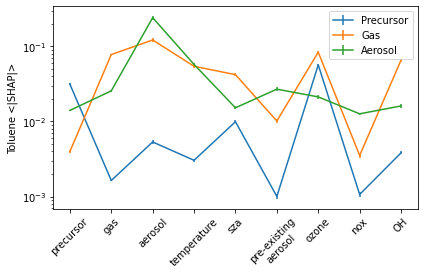

In [15]:
plt.figure()
plt.subplot(111)
plt.errorbar(range(9), pmean, yerr = psem, c = 'C0')
plt.errorbar(range(9), gmean, yerr = gsem, c = "C1")
plt.errorbar(range(9), amean, yerr = asem, c = "C2")

plt.yscale("log")

plt.ylabel("Toluene <|SHAP|>")
#plt.xlabel("Feature")

labels = ['precursor', 'gas', 'aerosol', 'temperature', 'sza', 'pre-existing\naerosol', 'ozone', 'nox', 'OH']
plt.xticks(range(9), labels, rotation=45)

plt.legend(["Precursor", "Gas", "Aerosol"], loc = "best")

plt.tight_layout()
plt.savefig(f"{save_location}/bulk_comparison.png")
#plt.show()

##### Compare a few experiments

In [16]:
colors = {i: f"C{i}" for i in range(9)}

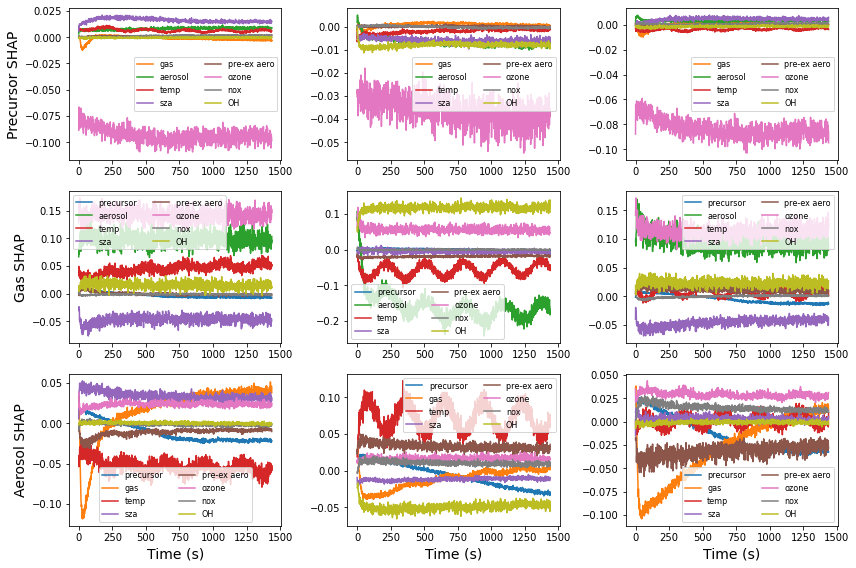

In [17]:
plt.figure(figsize=(12,8))

fontsize = 14

for k, exp in enumerate(["Exp1709", "Exp1632", "Exp1769"]):
    
    pre = np.load(f"{save_location}/validation_{exp}_pre.npy")
    gas = np.load(f"{save_location}/validation_{exp}_gas.npy")
    air = np.load(f"{save_location}/validation_{exp}_aero.npy")

    plt.subplot(3, 3, k + 1)
    leg = ['gas', 'aerosol', 'temp', 'sza', 'pre-ex aero', 'ozone', 'nox', 'OH']
    for i in [1, 2, 3, 4, 5, 6, 7, 8]:
        plt.plot(range(1439), pre[:, i], c = colors[i])
    if k == 0:
        plt.ylabel("Precursor SHAP", fontsize = fontsize)
    plt.legend(leg, fontsize = 8, ncol=2, loc = 'best')


    plt.subplot(3, 3, k + 4)
    leg = ['precursor', 'aerosol', 'temp', 'sza', 'pre-ex aero', 'ozone', 'nox', 'OH']
    for i in [0, 2, 3, 4, 5, 6, 7, 8]:
        plt.plot(range(1439), gas[:, i], c = colors[i])
    if k == 0:
        plt.ylabel("Gas SHAP", fontsize = fontsize)
    plt.legend(leg, fontsize = 8, ncol=2, loc = 'best')

    plt.subplot(3, 3, k + 7)
    leg = ['precursor', 'gas', 'temp', 'sza', 'pre-ex aero', 'ozone', 'nox', 'OH']
    for i in [0, 1, 3, 4, 5, 6, 7, 8]:
        plt.plot(range(1439), air[:, i], c = colors[i])
    if k == 0:
        plt.ylabel("Aerosol SHAP", fontsize = fontsize)
    plt.legend(leg, fontsize = 8, ncol=2, loc = 'best')

    plt.xlabel("Time (s)", fontsize = 14)

plt.tight_layout()
plt.savefig(f"{save_location}/exp_comparison.png")
plt.show()

In [19]:
#plt.savefig(f"{save_location}/exp_comparison.png")

### Create combined figures

In [4]:
def load_data(save_location):
    val_exps = sorted(list(set([x.split("_")[1] for x in glob.glob(f"{save_location}/*.npy")])))
    averages = {"pre": [], "gas": [], "air": []}
    deviations = {"pre": [], "gas": [], "air": []}

    for exp in val_exps:
        
        pre = np.load(f"{save_location}/validation_{exp}_pre.npy")
        gas = np.load(f"{save_location}/validation_{exp}_gas.npy")
        air = np.load(f"{save_location}/validation_{exp}_aero.npy")
        
        if "dodecane" in save_location:
            c1 = ([p > 10.0 for p in pre[:, 0]])
            if sum(c1) > 1:
                continue
        
        #c1 = ([10**p > 1.0 for p in pre[:, 0]])
        
        pre_ave = np.mean(np.abs(pre), axis = 0) 
        gas_ave = np.mean(np.abs(gas), axis = 0)
        air_ave = np.mean(np.abs(air), axis = 0)

        averages["pre"].append(pre_ave)
        averages["gas"].append(gas_ave)
        averages["air"].append(air_ave)

        #pre_std = np.mean(pre, axis = 0)
        #gas_std = np.mean(gas, axis = 0)
        #air_std = np.mean(air, axis = 0)

    averages["pre"] = np.vstack(averages["pre"])
    averages["gas"] = np.vstack(averages["gas"])
    averages["air"] = np.vstack(averages["air"])
    
    pmean = [np.mean(averages["pre"][:,i]) for i in range(9)]
    psem = [stats.sem(averages["pre"][:,i]) for i in range(9)]

    gmean = [np.mean(averages["gas"][:,i]) for i in range(9)]
    gsem = [stats.sem(averages["gas"][:,i]) for i in range(9)]

    amean = [np.mean(averages["air"][:,i]) for i in range(9)]
    asem = [stats.sem(averages["air"][:,i]) for i in range(9)]
    
    return pmean, psem, gmean, gsem, amean, asem

In [6]:
pmean1, psem1, gmean1, gsem1, amean1, asem1 = load_data("toluene/mlp")
pmean2, psem2, gmean2, gsem2, amean2, asem2 = load_data("toluene/gru")

pmean3, psem3, gmean3, gsem3, amean3, asem3 = load_data("dodecane/mlp")
pmean4, psem4, gmean4, gsem4, amean4, asem4 = load_data("dodecane/gru")

pmean5, psem5, gmean5, gsem5, amean5, asem5 = load_data("apin/mlp")
pmean6, psem6, gmean6, gsem6, amean6, asem6 = load_data("apin/gru")

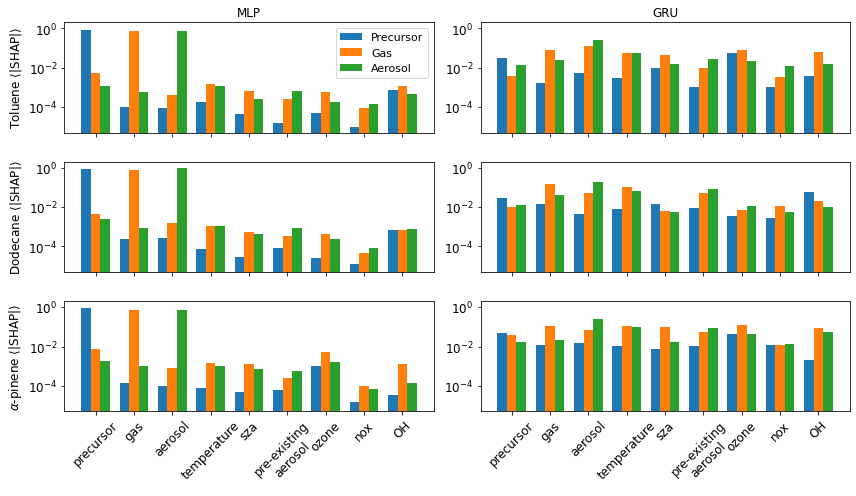

In [14]:
fontsize = 12

plt.figure(figsize = (12, 7))

ax1 = plt.subplot(321)
ax2 = plt.subplot(322)
ax3 = plt.subplot(323)
ax4 = plt.subplot(324)
ax5 = plt.subplot(325)
ax6 = plt.subplot(326)
axes = [ax1, ax2, ax3, ax4, ax5, ax6]

x_range_1 = [x - 0.25 for x in list(range(9))]
x_range_2 = [x + 0.25 for x in x_range_1]
x_range_3 = [x + 0.25 for x in x_range_2]

ax1.bar(x_range_1, pmean1, color = 'C0', width = 0.25)
ax1.bar(x_range_2, gmean1, color = "C1", width = 0.25)
ax1.bar(x_range_3, amean1, color = "C2", width = 0.25)

ax2.bar(x_range_1, pmean2, color = 'C0', width = 0.25)
ax2.bar(x_range_2, gmean2, color = "C1", width = 0.25)
ax2.bar(x_range_3, amean2, color = "C2", width = 0.25)

ax3.bar(x_range_1, pmean3, color = 'C0', width = 0.25)
ax3.bar(x_range_2, gmean3, color = "C1", width = 0.25)
ax3.bar(x_range_3, amean3, color = "C2", width = 0.25)

ax4.bar(x_range_1, pmean4, color = 'C0', width = 0.25)
ax4.bar(x_range_2, gmean4, color = "C1", width = 0.25)
ax4.bar(x_range_3, amean4, color = "C2", width = 0.25)

ax5.bar(x_range_1, pmean5, color = 'C0', width = 0.25)
ax5.bar(x_range_2, gmean5, color = "C1", width = 0.25)
ax5.bar(x_range_3, amean5, color = "C2", width = 0.25)

ax6.bar(x_range_1, pmean6, color = 'C0', width = 0.25)
ax6.bar(x_range_2, gmean6, color = "C1", width = 0.25)
ax6.bar(x_range_3, amean6, color = "C2", width = 0.25)

ax1.set_ylabel(r"Toluene $\langle$|SHAP|$\rangle$", fontsize = fontsize)
ax3.set_ylabel(r"Dodecane $\langle$|SHAP|$\rangle$", fontsize = fontsize)
ax5.set_ylabel(r"$\alpha$-pinene $\langle$|SHAP|$\rangle$", fontsize = fontsize)
#plt.xlabel("Feature")

labels = ['precursor', 'gas', 'aerosol', 'temperature', 'sza', 'pre-existing\naerosol', 'ozone', 'nox', 'OH']

for ax in axes:
    ax.set_xticks(range(9))
    ax.set_yscale("log")
    
    ax.set_ylim([5e-6, 2e0])
    
    ax.set_yticks([1e-4, 1e-2, 1e0])
    ax.set_yticklabels([r"$10^{-4}$", r"$10^{-2}$", r"$10^0$"], fontsize = fontsize) 

for ax in axes[:4]:
    ax.set_xticklabels([" " for x in labels])

ax5.set_xticklabels(labels, rotation=45, fontsize = fontsize)
ax6.set_xticklabels(labels, rotation=45, fontsize = fontsize)

ax1.legend(["Precursor", "Gas", "Aerosol"], loc = "best", fontsize = 11)

ax1.set_title("MLP", fontsize = fontsize)
ax2.set_title("GRU", fontsize = fontsize)

plt.tight_layout()

plt.savefig(f"all_shap_comparison.pdf", dpi = 300)

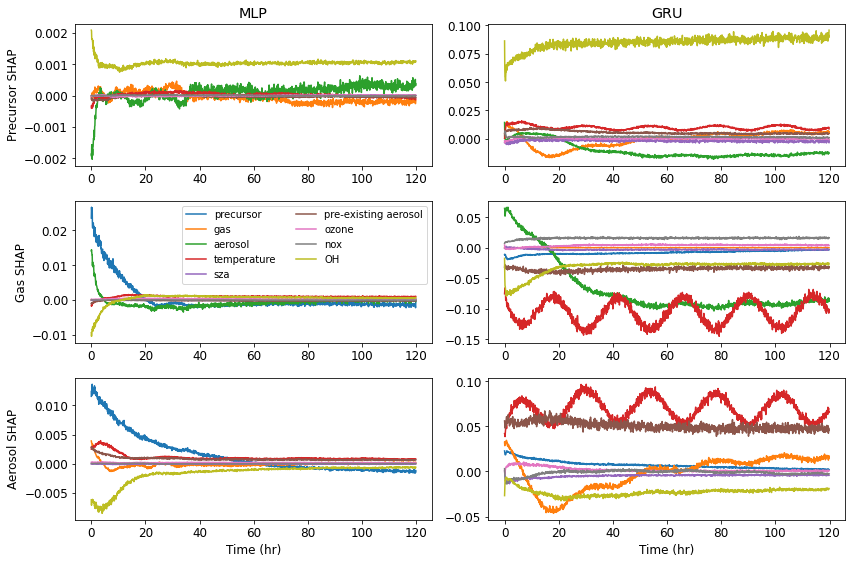

In [176]:
plt.figure(figsize=(12,8))

colors = {i: f"C{i}" for i in range(9)}
t_range = [300 * x / 3600 for x in range(1439)]

fontsize = 12
plt.rcParams.update({'font.size': fontsize})

leg = ['precursor', 'gas', 'aerosol', 'temperature', 'sza', 'pre-existing aerosol', 'ozone', 'nox', 'OH']

for k, save_location in enumerate(["dodecane/mlp", "dodecane/gru"]):
    
    for j, exp in enumerate(["Exp1632"]):

        pre = np.load(f"{save_location}/validation_{exp}_pre.npy")
        gas = np.load(f"{save_location}/validation_{exp}_gas.npy")
        air = np.load(f"{save_location}/validation_{exp}_aero.npy")

        plt.subplot(3, 2, k + 1)
        for i in [1, 2, 3, 4, 5, 6, 7, 8]:
            plt.plot(t_range, pre[:, i], c = colors[i])
        if k == 0:
            plt.ylabel("Precursor SHAP", fontsize = fontsize)
            plt.title("MLP")
        else:
            plt.title("GRU")

        plt.subplot(3, 2, k + 3)
        for i in [0, 1, 2, 3, 4, 5, 6, 7, 8]:
            if i == 1:# and "mlp" in save_location:
                 plt.plot(t_range, 1e-12 * gas[:, i], c = colors[i])
            else:
                plt.plot(t_range, gas[:, i], c = colors[i])
        if k == 0:
            plt.ylabel("Gas SHAP", fontsize = fontsize)
            plt.legend(leg, fontsize = 10, ncol=2, loc = 'best')
        #plt.legend(leg, fontsize = 8, ncol=2, loc = 'best')

        plt.subplot(3, 2, k + 5)
        for i in [0, 1, 3, 4, 5, 6, 7, 8]:
            plt.plot(t_range, air[:, i], c = colors[i])
        if k == 0:
            plt.ylabel("Aerosol SHAP", fontsize = fontsize)
        #plt.legend(leg, fontsize = 8, ncol=2, loc = 'best')

        plt.xlabel("Time (hr)", fontsize = fontsize)

plt.tight_layout()
plt.savefig(f"model_exp_comparison.pdf", dpi = 300)
plt.show()